In [2]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2727)

In [30]:
model = keras.Sequential(
    [
        layers.Dense(1, activation="tanh"),
        layers.Dense(20, activation="tanh"),
        layers.Dense(20, activation="tanh"),
        layers.Dense(1),
    ]
)

model(tf.ones((1,1)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.14028046]], dtype=float32)>

In [37]:
learning_rate = 0.01

def function_to_learn(x):
  return (x**2)*(2-x)

def loss(model, x):
  return tf.reduce_mean(tf.square(model(x) - function_to_learn(x)))

def train_step(model, x):
  with tf.GradientTape() as tape:
    tape.watch(model.trainable_variables)
    target = loss(model, x)
  grads = tape.gradient(target, model.trainable_variables)
  for w,g in zip(model.trainable_variables, grads):
    w.assign_sub(learning_rate * g)
  return target

def train(model, epochs, num_data):
  loss = []
  data_set = np.random.uniform(0,2,size=(num_data,1))
  for _ in range(epochs):
    value = train_step(model, data_set)
    loss.append(value)
  return loss

loss = train(model, 3000, 1000)


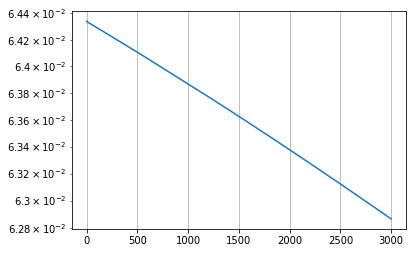

In [38]:
loss = list(map(lambda v: v.numpy(), loss))
plt.plot(loss)
plt.yscale("log")
plt.grid()

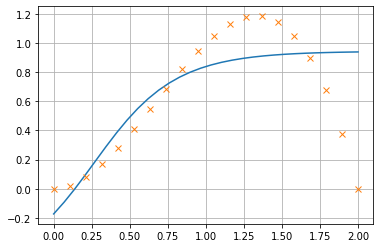

In [39]:
x = np.linspace(0,2,30)
y = [model(np.array([[v]]))[0][0].numpy() for v in x]
plt.plot(x,y)
x = np.linspace(0,2,20)
plt.plot(x, x**2*(2-x), 'x')
plt.grid()

In [40]:
x = tf.zeros((10,1))
tf.square(model(x) - function_to_learn(x))

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.02997553],
       [0.02997553],
       [0.02997553],
       [0.02997553],
       [0.02997553],
       [0.02997553],
       [0.02997553],
       [0.02997553],
       [0.02997553],
       [0.02997553]], dtype=float32)>

In [41]:
tf.reduce_mean(tf.square(model(x) - function_to_learn(x)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.029975528>